In [291]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics

# Data Preprocessing

In [292]:
df=pd.read_csv('kc_house_data.csv',sep=',')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [293]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [294]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [295]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [ ]:
Data

In [296]:
df[["price", "grade"]].groupby(["grade"], as_index=True).mean()


,price
grade,
1,1.420000e+05
3,2.056667e+05
4,2.143810e+05
5,2.485240e+05
6,3.019196e+05
7,4.025903e+05
8,5.428528e+05
9,7.735132e+05
10,1.071771e+06


In [297]:

l=[]
for i in df["date"]:
    e=i.split("T")[0]
    l.append(e)
df["date"]=l
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [298]:
df.drop(labels = ["id"], axis=1,inplace=True)

In [299]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 20 , 15 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .6}, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 10}

        )

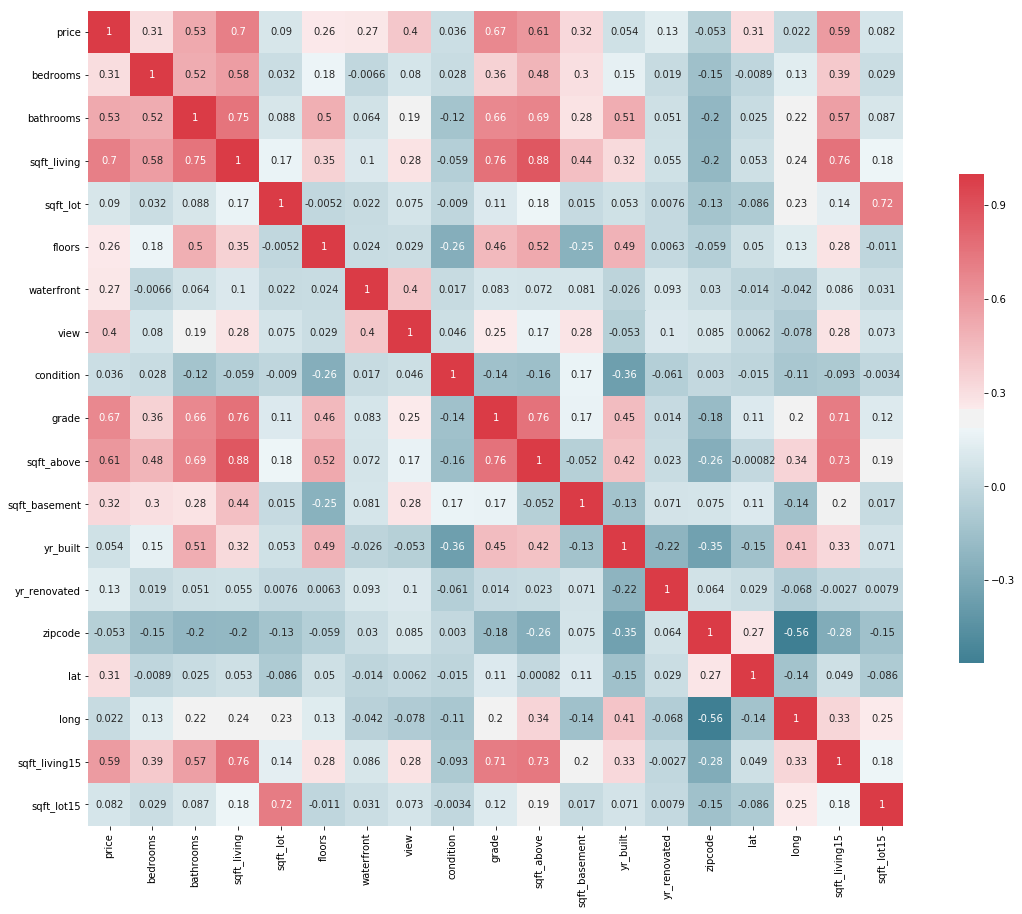

In [300]:
plot_correlation_map(df)


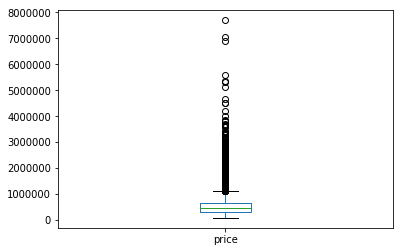

In [301]:
df['price'].plot.box()

In [302]:
"""from sklearn.preprocessing import Standardscaler
scaler=StandardScaler()
df["floors"]=scaler.fit_transform(df["floors"].values)
df["view"]=scaler.fit_transform(df["view"].values)"""

'from sklearn.preprocessing import Standardscaler\nscaler=StandardScaler()\ndf["floors"]=scaler.fit_transform(df["floors"].values)\ndf["view"]=scaler.fit_transform(df["view"].values)'

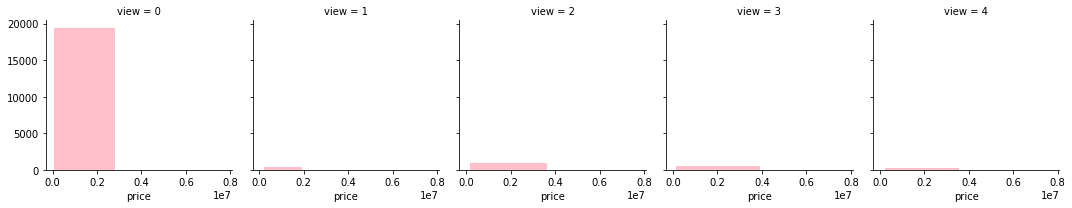

In [366]:
import seaborn as sns
g=sns.FacetGrid(df,col='view')
g.map(plt.hist,'price',bins=2, color='pink')

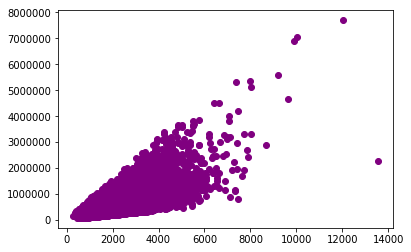

In [369]:
plt.scatter(df['sqft_living'],df['price'], color="purple")

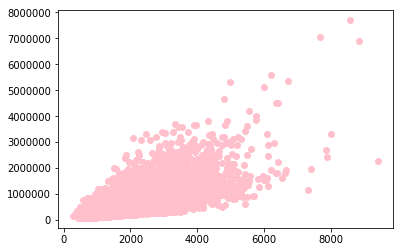

In [305]:
plt.scatter(df['sqft_above'],df['price'], color='pink')

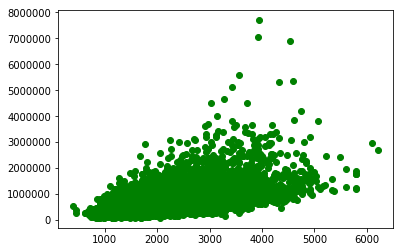

In [306]:
plt.scatter(df['sqft_living15'],df['price'], color='green')

# Linear Regression 

In [344]:
x=df["sqft_living"].values[:,np.newaxis]
y=df["price"].values

In [345]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=30)

In [346]:
model=LinearRegression()

In [347]:
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [348]:
predicted=model.predict(x_test)

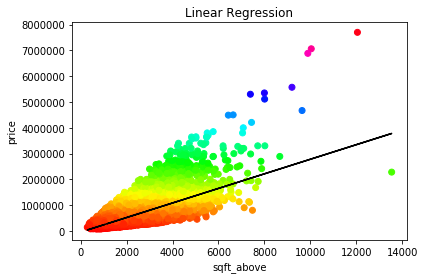

In [349]:
plt.scatter(x,y,c=y,cmap='hsv')
plt.title("Linear Regression")
plt.ylabel("price")
plt.xlabel("sqft_above")
plt.plot(x,model.predict(x),color="k")
plt.show()

In [350]:
print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

('MSE', 64179676631.68388)
('R squared', 0.4879814110728805)


In [351]:
model.coef_

array([282.53959684])

In [352]:
model.intercept_

-46813.8159424396

# Multi-Linear Regression

In [353]:

x=df[["sqft_living","sqft_above","sqft_living15","bathrooms","bedrooms","grade","view","sqft_basement","waterfront","floors","lat"]]  
y=df["price"].values


In [354]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40)



In [355]:
model=LinearRegression() 


In [356]:
model.fit(x_train,y_train) 


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [357]:
predicted=model.predict(x_test) 



In [358]:
print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

('MSE', 42567454480.754)
('R squared', 0.6614039882586287)


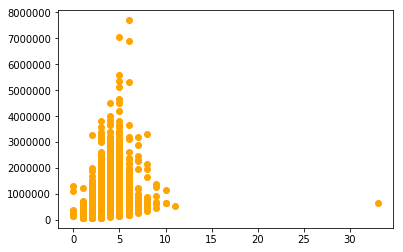

In [370]:
plt.scatter(df['bedrooms'],df['price'],color="orange")

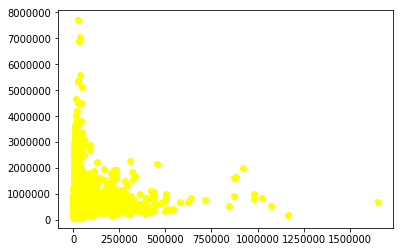

In [323]:
plt.scatter(df['sqft_lot'],df['price'],color='yellow')

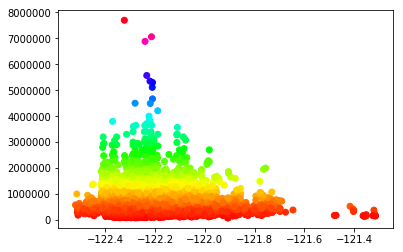

In [324]:
plt.scatter(df['long'],df['price'],c=y,cmap="hsv")

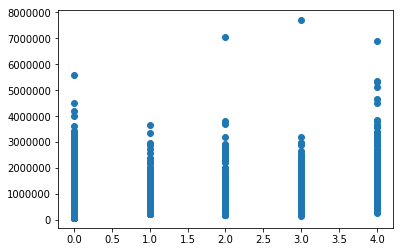

In [325]:
plt.scatter(df['view'],df['price'])

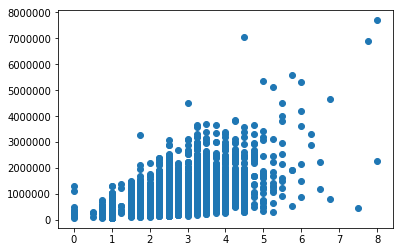

In [326]:
plt.scatter(df['bathrooms'],df['price'])

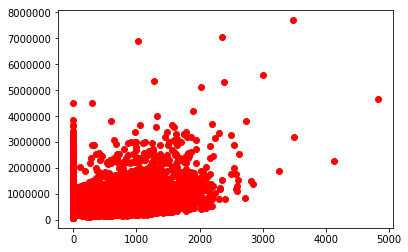

In [374]:
plt.scatter(df['sqft_basement'],df['price'],color="r")

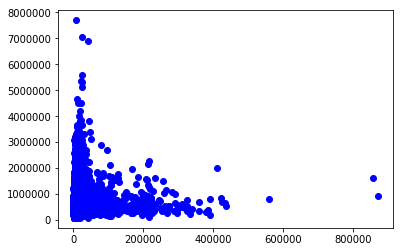

In [328]:
plt.scatter(df['sqft_lot15'],df['price'],color="blue")

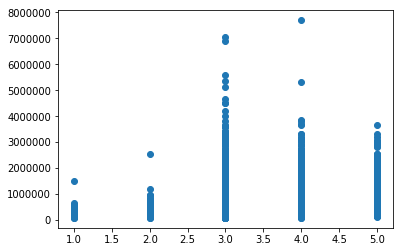

In [329]:
plt.scatter(df['condition'],df['price'])

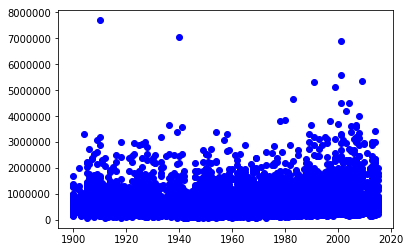

In [372]:
plt.scatter(df['yr_built'],df['price'], color="blue")

# Polynomiale Regression

In [331]:

x= df[["sqft_lot", "sqft_lot15","long","yr_built","yr_renovated","view","lat","zipcode","grade","sqft_basement","grade","condition","waterfront","bedrooms"]]
y= df["price"].values



In [332]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=40)  


In [333]:
from sklearn.preprocessing import PolynomialFeatures 
poly=PolynomialFeatures(degree=2)

x_train_fit = poly.fit_transform(x_train) 
model.fit(x_train_fit, y_train)
x_test_ = poly.fit_transform(x_test)
predicted = model.predict(x_test_)


In [334]:
print("MSE: ", metrics.mean_squared_error(y_test, predicted))
print("R squared: ", metrics.r2_score(y_test,predicted))


('MSE: ', 32383891614.642494)
('R squared: ', 0.7424075111106205)
